In [1]:
# download nltk stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Install a particular version of `google-cloud-storage` because (oddly enough) 
# the  version on Colab and GCP is old. A dependency error below is okay.
!pip install -q google-cloud-storage==1.43.0

In [3]:
# authenticate below for Google Storage access as needed
from google.colab import auth
auth.authenticate_user()

In [4]:
# install ngrok to emulate public IP / address
!wget -N https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -O ngrok-stable-linux-amd64.zip
!unzip -u ngrok-stable-linux-amd64.zip

for details.

--2023-01-17 17:18:24--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 18.205.222.128, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  8.61MB/s    in 1.5s    

2023-01-17 17:18:25 (8.61 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip


In [5]:
# TODO: sign up for an ngrok account
# then put your ngrok token below, uncomment, and execute
!./ngrok authtoken 22KeqcMQYpd2iRnsaZZOzlyaNw0_5NAk69pXRUMvfrf1oCNpU

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [6]:
# install a ngrok python package and a version of flask that works with it in 
# colab
!pip -q install flask-ngrok
!pip -q install flask==0.12.2
# !pip -q install flask_restful

# Run the app

In [ ]:
# you need to upload your implementation of search_app.py
import search_frontend as se

In [ ]:
# uncomment the code below and execute to reload the module when you make 
# changes to search_frontend.py (after you upload again).
# import importlib
# importlib.reload(se)

In [ ]:
from flask_ngrok import run_with_ngrok
run_with_ngrok(se.app) 
se.app.run()

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://c271-34-125-136-123.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [04/Jan/2022 08:48:13] "GET /search?query=hello HTTP/1.1" 200 -
127.0.0.1 - - [04/Jan/2022 08:48:13] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [04/Jan/2022 08:49:10] "GET /search_body?query=hello HTTP/1.1" 200 -
127.0.0.1 - - [04/Jan/2022 08:49:10] "GET /favicon.ico HTTP/1.1" 404 -


# Testing your app

Once your app is running you can query it. You can simply do that by navigating to the URL that ngrok gave you above or through code in a different python session. For example, once the frontend app is running, you can navigate to:
http://YOUR_SERVER_DOMAIN/search?query=hello+world where YOUR_SERVER_DOMAIN is something like XXXX-XX-XX-XX-XX.ngrok.io, which is printed above in Colab or that is your external IP on GCP.

The code below shows how to issue a query from python. This is also how our testing code will issue queries to your search engine, so make sure to test your search engine this way after you deploy it to GCP and before submission. Command line instructions for deploying your search engine to GCP are available at `run_frontend_in_gcp.sh`. Note that we will not only issue training queries to your search engine, but also test queries, i.e. queries that you've never seen before.

In [11]:
import json

with open('queries_train.json', 'rt') as f:
  queries = json.load(f)

In [12]:
def average_precision(true_list, predicted_list, k=40):
    true_set = frozenset(true_list)
    predicted_list = predicted_list[:k]
    precisions = []
    for i,doc_id in enumerate(predicted_list):        
        if doc_id in true_set:
            prec = (len(precisions)+1) / (i+1)            
            precisions.append(prec)
    if len(precisions) == 0:
        return 0.0
    return round(sum(precisions)/len(precisions),3)

In [57]:
import requests
from time import time
url = 'http://34.28.208.52:8080/'
# place the domain you got from ngrok or GCP IP below. 
#url = 'http://XXXX-XX-XX-XX-XX.ngrok.io'

qs_res = []
for q, true_wids in queries.items():
  duration, ap = None, None
  t_start = time()
  try:
    res = requests.get(url + '/search', {'query': q}, timeout=35)
    duration = time() - t_start
    if res.status_code == 200:
      pred_wids, _ = zip(*res.json())
      ap = average_precision(true_wids, pred_wids)
      print(q)
      print(ap)
  except:
    pass
  
  qs_res.append((q, duration, ap))

best marvel movie
0.639
How do kids come to world?
0.0
Information retrieval
1.0
LinkedIn
1.0
How to make coffee?
0.5
Ritalin
0.804
How to make wine at home?
0.478
Most expensive city in the world
1.0
India
1.0
how to make money fast?
1.0
Netflix
1.0
Apple computer
1.0
The Simpsons
0.804
World cup
0.833
How to lose weight?
0.417
Java
1.0
Air Jordan
0.7
how to deal with depression?
0.367
How do you make gold
0.583
Marijuana
0.333
How to make hummus
0.679
Winter
0.333
Rick and Morty
1.0
Natural Language processing
0.583
World Cup 2022
0.5
Dolly the sheep
0.75
What is the best place to live in?
0.0
Elon musk
1.0
How do you breed flowers?
0.833


In [59]:
prescsion_list = [x[2] for x in qs_res]
prescsion_list = list(filter(lambda x: x != None, prescsion_list))
map40_s = sum(prescsion_list)/len(qs_res)
print(map40_s)
duration1 = durationprescsion_list = [x[1] for x in qs_res]
prescsion_list = list(filter(lambda x: x != None, prescsion_list))
dur_s_tot = sum(duration1)
print(dur_s_tot)
dur_s_tot = dur_s_tot/30
print(dur_s_tot)

0.6711999999999999
21.278997659683228
0.7092999219894409


In [29]:
import requests
from time import time
url = 'http://34.28.208.52:8080/'
# place the domain you got from ngrok or GCP IP below. 
#url = 'http://XXXX-XX-XX-XX-XX.ngrok.io'

qs_res = []
for q, true_wids in queries.items():
  duration, ap = None, None
  t_start = time()
  try:
    res = requests.get(url + '/search1', {'query': q}, timeout=35)
    duration = time() - t_start
    if res.status_code == 200:
      pred_wids, _ = zip(*res.json())
      ap = average_precision(true_wids, pred_wids)
  except:
    pass
  
  qs_res.append((q, duration, ap))

In [30]:
prescsion_list = [x[2] for x in qs_res]
prescsion_list = list(filter(lambda x: x != None, prescsion_list))
map40_s1 = sum(prescsion_list)/len(qs_res)
print(map40_s1)
duration2 = durationprescsion_list = [x[1] for x in qs_res]
prescsion_list = list(filter(lambda x: x != None, prescsion_list))
dur_s_tot = sum(duration2)
print(dur_s_tot)
dur_s_avg1 = dur_s_tot/30
print(dur_s_avg1)

0.4587000000000001
20.91480779647827
0.6971602598826091


In [31]:
import requests
from time import time
url = 'http://34.28.208.52:8080/'
# place the domain you got from ngrok or GCP IP below. 
#url = 'http://XXXX-XX-XX-XX-XX.ngrok.io'

qs_res = []
for q, true_wids in queries.items():
  duration, ap = None, None
  t_start = time()
  try:
    res = requests.get(url + '/search2', {'query': q}, timeout=35)
    duration = time() - t_start
    if res.status_code == 200:
      pred_wids, _ = zip(*res.json())
      ap = average_precision(true_wids, pred_wids)
  except:
    pass
  
  qs_res.append((q, duration, ap))

In [32]:
prescsion_list = [x[2] for x in qs_res]
prescsion_list = list(filter(lambda x: x != None, prescsion_list))
map40_s2 = sum(prescsion_list)/len(qs_res)
print(map40_s2)
duration3 = durationprescsion_list = [x[1] for x in qs_res]
prescsion_list = list(filter(lambda x: x != None, prescsion_list))
dur_s_tot = sum(duration3)
print(dur_s_tot)
dur_s_avg2 = dur_s_tot/30
print(dur_s_avg2)

0.4587000000000001
18.638490200042725
0.6212830066680908


In [39]:
import requests
from time import time
url = 'http://34.28.208.52:8080/'
# place the domain you got from ngrok or GCP IP below. 
#url = 'http://XXXX-XX-XX-XX-XX.ngrok.io'

qs_res = []
for q, true_wids in queries.items():
  duration, ap = None, None
  t_start = time()
  try:
    res = requests.get(url + '/search', {'query': q}, timeout=35)
    duration = time() - t_start
    if res.status_code == 200:
      pred_wids, _ = zip(*res.json())
      ap = average_precision(true_wids, pred_wids)
  except:
    pass
  
  qs_res.append((q, duration, ap))

In [40]:
prescsion_list = [x[2] for x in qs_res]
prescsion_list = list(filter(lambda x: x != None, prescsion_list))
map40_s3 = sum(prescsion_list)/len(qs_res)
print(map40_s3)
duration4 = durationprescsion_list = [x[1] for x in qs_res]
prescsion_list = list(filter(lambda x: x != None, prescsion_list))
dur_s_tot = sum(duration4)
print(dur_s_tot)
dur_s_avg3 = dur_s_tot/30
print(dur_s_avg3)

0.46210000000000007
17.99613046646118
0.599871015548706


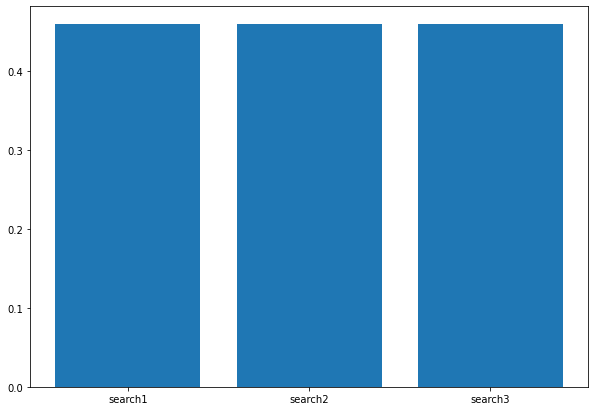

In [35]:
from matplotlib import pyplot as plt
 
# Read CSV into pandas
search = ["search1","search2","search3"]
search_map40 = [map40_s1,map40_s2,map40_s3]
search_avg_time =  [dur_s_avg1,dur_s_avg2,dur_s_avg3]
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(search, search_map40)
 
# Show Plot
plt.show()

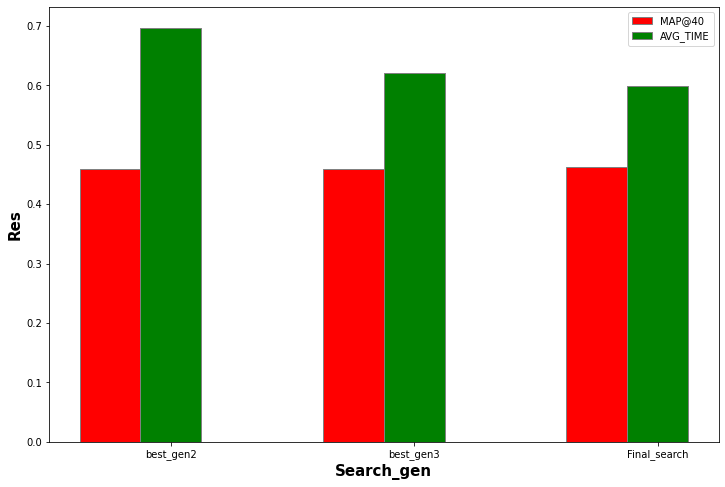

In [41]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
search = ["search1","search2","search3"]
search_map40 = [map40_s1,map40_s2,map40_s3]
search_avg_time =  [dur_s_avg1,dur_s_avg2,dur_s_avg3]
 
# Set position of bar on X axis
br1 = np.arange(len(search_map40 ))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, search_map40, color ='r', width = barWidth,
        edgecolor ='grey', label ='MAP@40')
plt.bar(br2, search_avg_time, color ='g', width = barWidth,
        edgecolor ='grey', label ='AVG_TIME')
 
# Adding Xticks
plt.xlabel('Search_gen', fontweight ='bold', fontsize = 15)
plt.ylabel('Res', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(search_map40))],
        ["best_gen2","best_gen3","Final_search",])
 
plt.legend()
plt.show()

In [24]:
import requests
from time import time
url = 'http://34.28.208.52:8080/'
# place the domain you got from ngrok or GCP IP below. 
#url = 'http://XXXX-XX-XX-XX-XX.ngrok.io'

qs_res = []
for q, true_wids in queries.items():
  duration, ap = None, None
  t_start = time()
  try:
    res = requests.get(url + '/search4', {'query': q}, timeout=35)
    duration = time() - t_start
    if res.status_code == 200:
      pred_wids, _ = zip(*res.json())
      ap = average_precision(true_wids, pred_wids)
  except:
    pass
  
  qs_res.append((q, duration, ap))

prescsion_list = [x[2] for x in qs_res]
prescsion_list = list(filter(lambda x: x != None, prescsion_list))
map40_s4 = sum(prescsion_list)/len(qs_res)
print(map40_s4)
duration4 = durationprescsion_list = [x[1] for x in qs_res]
prescsion_list = list(filter(lambda x: x != None, prescsion_list))
dur_s_tot = sum(duration4)
print(dur_s_tot)
dur_s_avg4 = dur_s_tot/30
print(dur_s_avg4)

0.4587000000000001
20.53291368484497
0.684430456161499


In [25]:
import requests
from time import time
url = 'http://34.28.208.52:8080/'
# place the domain you got from ngrok or GCP IP below. 
#url = 'http://XXXX-XX-XX-XX-XX.ngrok.io'

qs_res = []
for q, true_wids in queries.items():
  duration, ap = None, None
  t_start = time()
  try:
    res = requests.get(url + '/search5', {'query': q}, timeout=35)
    duration = time() - t_start
    if res.status_code == 200:
      pred_wids, _ = zip(*res.json())
      ap = average_precision(true_wids, pred_wids)
  except:
    pass
  
  qs_res.append((q, duration, ap))

prescsion_list = [x[2] for x in qs_res]
prescsion_list = list(filter(lambda x: x != None, prescsion_list))
map40_s5 = sum(prescsion_list)/len(qs_res)
print(map40_s5)
duration5 = durationprescsion_list = [x[1] for x in qs_res]
prescsion_list = list(filter(lambda x: x != None, prescsion_list))
dur_s_tot = sum(duration5)
print(dur_s_tot)
dur_s_avg5 = dur_s_tot/30
print(dur_s_avg5)

0.4584666666666667
18.229984760284424
0.6076661586761475


In [26]:
import requests
from time import time
url = 'http://34.28.208.52:8080/'
# place the domain you got from ngrok or GCP IP below. 
#url = 'http://XXXX-XX-XX-XX-XX.ngrok.io'

qs_res = []
for q, true_wids in queries.items():
  duration, ap = None, None
  t_start = time()
  try:
    res = requests.get(url + '/search6', {'query': q}, timeout=35)
    duration = time() - t_start
    if res.status_code == 200:
      pred_wids, _ = zip(*res.json())
      ap = average_precision(true_wids, pred_wids)
  except:
    pass
  
  qs_res.append((q, duration, ap))

prescsion_list = [x[2] for x in qs_res]
prescsion_list = list(filter(lambda x: x != None, prescsion_list))
map40_s6 = sum(prescsion_list)/len(qs_res)
print(map40_s6)
duration6 = durationprescsion_list = [x[1] for x in qs_res]
prescsion_list = list(filter(lambda x: x != None, prescsion_list))
dur_s_tot = sum(duration2)
print(dur_s_tot)
dur_s_avg6 = dur_s_tot/30
print(dur_s_avg5)

0.45803333333333346
21.34709358215332
0.6076661586761475


In [27]:
import requests
from time import time
url = 'http://34.28.208.52:8080/'
# place the domain you got from ngrok or GCP IP below. 
#url = 'http://XXXX-XX-XX-XX-XX.ngrok.io'

qs_res = []
for q, true_wids in queries.items():
  duration, ap = None, None
  t_start = time()
  try:
    res = requests.get(url + '/search7', {'query': q}, timeout=35)
    duration = time() - t_start
    if res.status_code == 200:
      pred_wids, _ = zip(*res.json())
      ap = average_precision(true_wids, pred_wids)
  except:
    pass
  
  qs_res.append((q, duration, ap))

prescsion_list = [x[2] for x in qs_res]
prescsion_list = list(filter(lambda x: x != None, prescsion_list))
map40_s7 = sum(prescsion_list)/len(qs_res)
print(map40_s7)
duration7 = durationprescsion_list = [x[1] for x in qs_res]
prescsion_list = list(filter(lambda x: x != None, prescsion_list))
dur_s_tot = sum(duration7)
print(dur_s_tot)
dur_s_avg7 = dur_s_tot/30
print(dur_s_avg7)

0.4580000000000001
17.402526140213013
0.5800842046737671


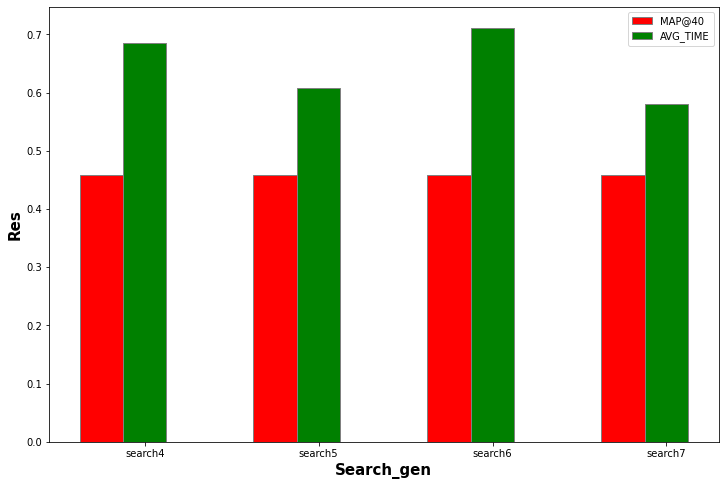

In [28]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
search = ["search4","search5","search6","search7"]
search_map40 = [map40_s4,map40_s5,map40_s6,map40_s7]
search_avg_time =  [dur_s_avg4,dur_s_avg5,dur_s_avg6,dur_s_avg7]
 
# Set position of bar on X axis
br1 = np.arange(len(search_map40 ))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, search_map40, color ='r', width = barWidth,
        edgecolor ='grey', label ='MAP@40')
plt.bar(br2, search_avg_time, color ='g', width = barWidth,
        edgecolor ='grey', label ='AVG_TIME')
 
# Adding Xticks
plt.xlabel('Search_gen', fontweight ='bold', fontsize = 15)
plt.ylabel('Res', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(search_map40))],
        ["search4","search5","search6","search7"])
 
plt.legend()
plt.show()

In [45]:
import requests
from time import time
url = 'http://34.28.208.52:8080/'
# place the domain you got from ngrok or GCP IP below. 
#url = 'http://XXXX-XX-XX-XX-XX.ngrok.io'

map40=list()
dur_tot=list()
dur_avg=list()
for i in range(7):
  qs_res = []
  for q, true_wids in queries.items():
    duration, ap = None, None
    t_start = time()
    try:
      res = requests.get(url + f'/search{i}', {'query': q}, timeout=35)
      duration = time() - t_start
      if res.status_code == 200:
        pred_wids, _ = zip(*res.json())
        ap = average_precision(true_wids, pred_wids)
    except:
      pass
    
    qs_res.append((q, duration, ap))

  prescsion_list = [x[2] for x in qs_res]
  prescsion_list = list(filter(lambda x: x != None, prescsion_list))
  map40_s = sum(prescsion_list)/len(qs_res)
  map40.append(map40_s)
  duration1 = durationprescsion_list = [x[1] for x in qs_res]
  prescsion_list = list(filter(lambda x: x != None, prescsion_list))
  dur_s_tot = sum(duration1)
  dur_tot.append(dur_s_tot)
  dur_s_avg1 = dur_s_tot/30
  dur_avg.append(dur_s_avg1)


In [50]:
 dur_tot

[19.219874143600464,
 17.944647550582886,
 17.744429111480713,
 17.295845985412598,
 17.200169801712036,
 16.865697622299194,
 16.34926962852478]

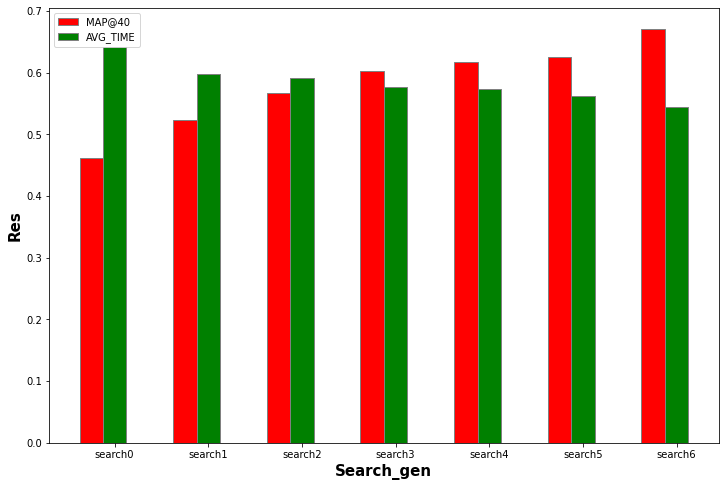

In [47]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
search = ["search0","search1","search2","search3","search4","search5","search6","search7"]
search_map40 = map40
search_avg_time = dur_avg
 
# Set position of bar on X axis
br1 = np.arange(len(search_map40 ))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, search_map40, color ='r', width = barWidth,
        edgecolor ='grey', label ='MAP@40')
plt.bar(br2, search_avg_time, color ='g', width = barWidth,
        edgecolor ='grey', label ='AVG_TIME')
 
# Adding Xticks
plt.xlabel('Search_gen', fontweight ='bold', fontsize = 15)
plt.ylabel('Res', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(search_map40))],
        ["search0","search1","search2","search3","search4","search5","search6","search7"])
 
plt.legend()
plt.show()

In [42]:
#TESTS

import requests
res = requests.post('http://34.28.208.52:8080/get_pageview', json=[35646178, 224785, 57374888, 267657])


In [43]:
if res.status_code == 200:
         suka = res.json()

In [44]:
suka

[638, 13014, 219, 39332]